<a href="https://colab.research.google.com/github/Atharv-2004/AerofitDataAnalysis/blob/main/AerofitDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

aerofit_data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

aerofit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


here we get the datatype of each column

In [ ]:
aerofit_data.dtypes


Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

No. of rows and columns


In [ ]:
print(f"'Number of Rows' : {aerofit_data.shape[0]}\n'Number of Columns' : {aerofit_data.shape[1]}")

'Number of Rows' : 180
'Number of Columns' : 9


Check for the missing values and find the number of missing values in each column

In [ ]:
aerofit_data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

checking for duplicate values

In [ ]:
aerofit_data.duplicated().value_counts()

False    180
dtype: int64

Viewing and understanding few 5 rows of the Netfix dataframe

In [ ]:
aerofit_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Checking the unique values for columns



In [ ]:
for i in aerofit_data.columns:
    print(f'Unique Values in {i} column are :-\n {aerofit_data[i].unique()}\n')
    print('.'*80)

Unique Values in Product column are :-
 ['KP281' 'KP481' 'KP781']

................................................................................
Unique Values in Age column are :-
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

................................................................................
Unique Values in Gender column are :-
 ['Male' 'Female']

................................................................................
Unique Values in Education column are :-
 [14 15 12 13 16 18 20 21]

................................................................................
Unique Values in MaritalStatus column are :-
 ['Single' 'Partnered']

................................................................................
Unique Values in Usage column are :-
 [3 2 4 5 6 7]

................................................................................
Unique Values in Fitness column are :-
 [4 3 2 1 5]

........

 number of unique values for columns

In [ ]:
for i in aerofit_data.columns:
    print('Number of Unique Values in',i,'column :', aerofit_data[i].nunique())
    print('-'*70)

Number of Unique Values in Product column : 3
----------------------------------------------------------------------
Number of Unique Values in Age column : 32
----------------------------------------------------------------------
Number of Unique Values in Gender column : 2
----------------------------------------------------------------------
Number of Unique Values in Education column : 8
----------------------------------------------------------------------
Number of Unique Values in MaritalStatus column : 2
----------------------------------------------------------------------
Number of Unique Values in Usage column : 6
----------------------------------------------------------------------
Number of Unique Values in Fitness column : 5
----------------------------------------------------------------------
Number of Unique Values in Income column : 62
----------------------------------------------------------------------
Number of Unique Values in Miles column : 37
-----------------

Statistical summary of All columns

In [ ]:
aerofit_data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Finding the outliers for every continuous variable in the dataset

In [ ]:
continuous_var = ['Age', 'Income', 'Usage', 'Fitness', 'Miles']
arr = {'5th percentile': 5, '25th percentile or Q1': 25, '50th percentile or Q2': 50, '75th percentile or Q3': 75,
       '95th percentile': 95}
for key, value in arr.items():
    for var in continuous_var:
        print(f'{var} -> {key} : {np.percentile(aerofit_data[var], value):.2f}')

Age -> 5th percentile : 20.00
Income -> 5th percentile : 34053.15
Usage -> 5th percentile : 2.00
Fitness -> 5th percentile : 2.00
Miles -> 5th percentile : 47.00
Age -> 25th percentile or Q1 : 24.00
Income -> 25th percentile or Q1 : 44058.75
Usage -> 25th percentile or Q1 : 3.00
Fitness -> 25th percentile or Q1 : 3.00
Miles -> 25th percentile or Q1 : 66.00
Age -> 50th percentile or Q2 : 26.00
Income -> 50th percentile or Q2 : 50596.50
Usage -> 50th percentile or Q2 : 3.00
Fitness -> 50th percentile or Q2 : 3.00
Miles -> 50th percentile or Q2 : 94.00
Age -> 75th percentile or Q3 : 33.00
Income -> 75th percentile or Q3 : 58668.00
Usage -> 75th percentile or Q3 : 4.00
Fitness -> 75th percentile or Q3 : 4.00
Miles -> 75th percentile or Q3 : 114.75
Age -> 95th percentile : 43.05
Income -> 95th percentile : 90948.25
Usage -> 95th percentile : 5.05
Fitness -> 95th percentile : 5.00
Miles -> 95th percentile : 200.00


In [ ]:
for var in continuous_var:
    # Calculate the IQR for the variable
    Q1 = np.percentile(aerofit_data[var], arr['25th percentile or Q1'])
    Q3 = np.percentile(aerofit_data[var], arr['75th percentile or Q3'])
    percentile_95 = np.percentile(aerofit_data[var], arr['95th percentile'])
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers for the variable
    outliers = aerofit_data[(aerofit_data[var] < lower_threshold) | (aerofit_data[var] > upper_threshold)]

    # Calculate the percentage of outliers
    outlier_percentage = round(len(outliers) / len(aerofit_data[var]) * 100, 2 )

    # Output the percentage of outliers
    print(f"IQR for {var}: {IQR}")
    print(f"Outlier above this Q3 {var} : {upper_threshold}")
    print(f"Percentage of outliers for {var}: {outlier_percentage}% \n")

IQR for Age: 9.0
Outlier above this Q3 Age : 46.5
Percentage of outliers for Age: 2.78% 

IQR for Income: 14609.25
Outlier above this Q3 Income : 80581.875
Percentage of outliers for Income: 10.56% 

IQR for Usage: 1.0
Outlier above this Q3 Usage : 5.5
Percentage of outliers for Usage: 5.0% 

IQR for Fitness: 1.0
Outlier above this Q3 Fitness : 5.5
Percentage of outliers for Fitness: 1.11% 

IQR for Miles: 48.75
Outlier above this Q3 Miles : 187.875
Percentage of outliers for Miles: 7.22% 



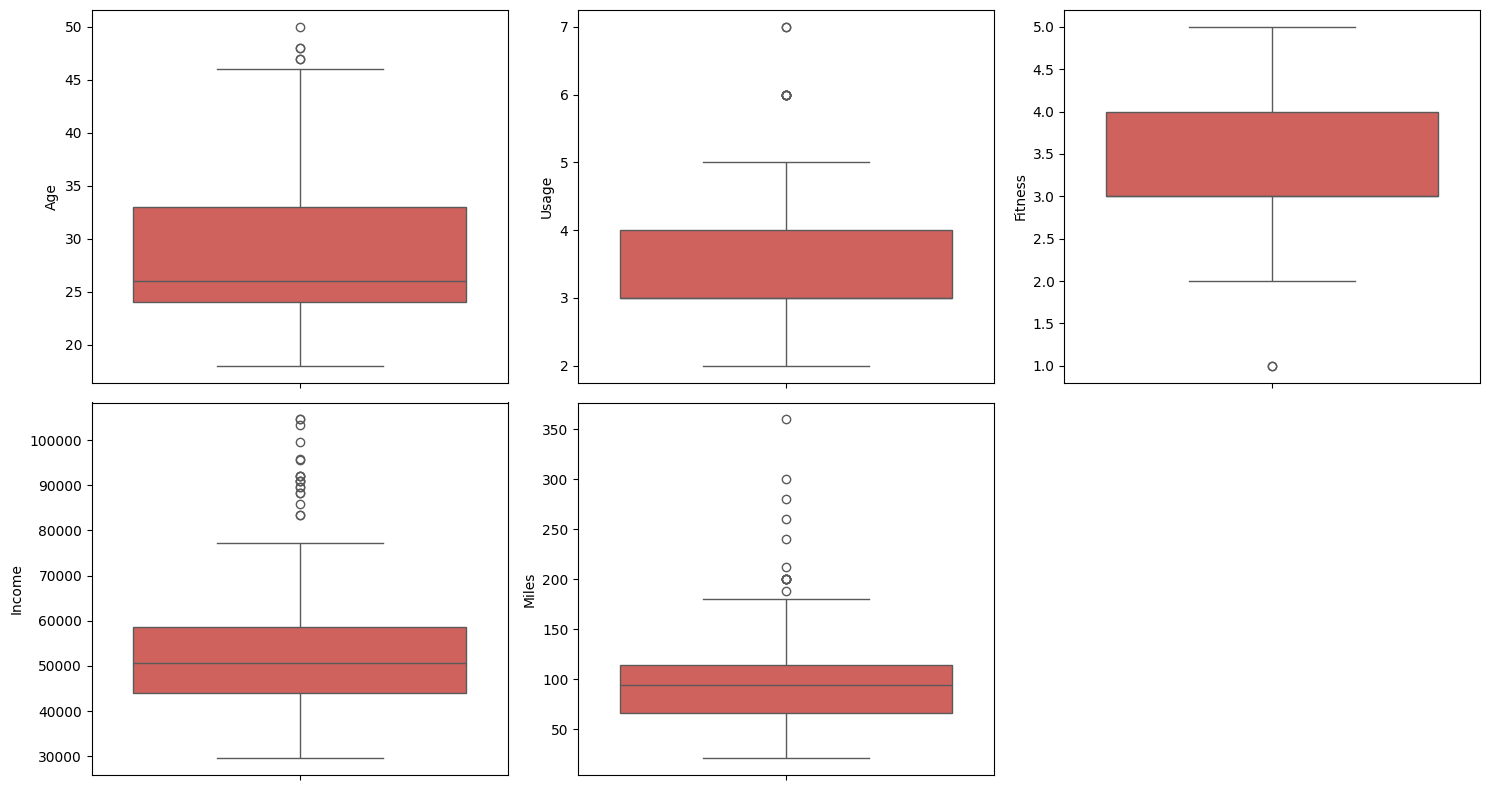

In [ ]:
plt.figure(figsize=(15,8))

# Box Plot for Age
plt.subplot(2,3,1)
sns.boxplot(aerofit_data['Age'])

# Box Plot for Usage
plt.subplot(2,3,2)
sns.boxplot(aerofit_data['Usage'])

#Box Plot for Fitness
plt.subplot(2,3,3)
sns.boxplot(aerofit_data['Fitness'])

#Box Plot for Income
plt.subplot(2,3,4)
sns.boxplot(aerofit_data['Income'])

#Box Plot for Miles
plt.subplot(2,3,5)
sns.boxplot(aerofit_data['Miles'])

plt.tight_layout()
plt.show()

INSIGHTS AND OBSERVATION
From the graphical depiction provided, it's clear that both Income and Miles exhibit a significant number of outliers, whereas the other variables show relatively fewer outliers in comparison.

Age has the lowest percentage of outliers at 2.78%, while Income has the highest percentage at 10.56%.

Non-Graphical Analysis: Value counts and unique attributes along with Gaphical : Univariate & Bivariate analysis
For Non-Graphical Analysis:

In [ ]:
categorical_columns= ['Product', 'Gender', 'MaritalStatus']
 #a) Non-graphical analysis: Value counts for each categorical variable
for column in categorical_columns:
    print(f"{aerofit_data[column].value_counts()}\n")

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Male      104
Female     76
Name: Gender, dtype: int64

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64



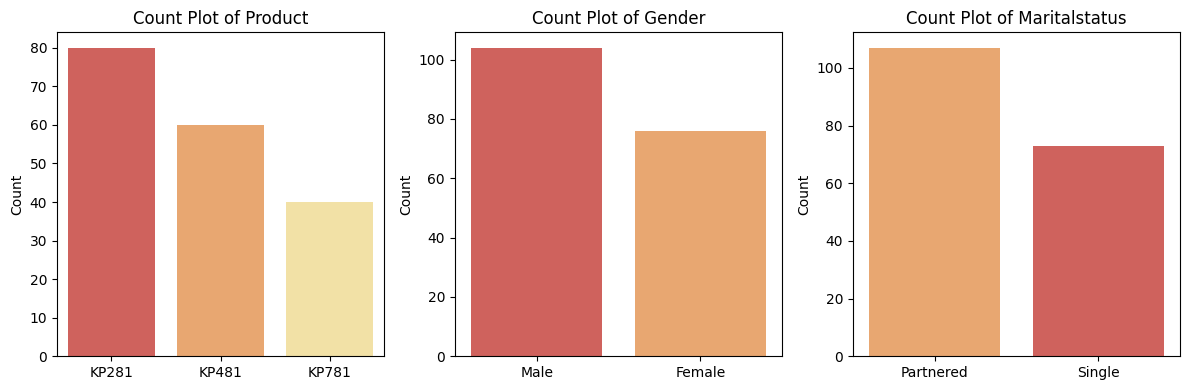

In [ ]:
 # Countplots for each categorical variable
fig,axes = plt.subplots(1, 3,figsize=(12, 4))
for i, column in enumerate(categorical_columns):
    order = aerofit_data[column].value_counts().index[:10]
    sns.countplot(x=column, data=aerofit_data, order=order, ax=axes[i], hue=column)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='y',labelsize=10)
    axes[i].tick_params(axis='x',labelsize=10)
plt.tight_layout()
plt.show()

checking unique value in columns

In [ ]:
for i in aerofit_data.columns:
    print(f'Unique Values in {i} column are :-\n {aerofit_data[i].unique()}\n')
    print('.'*80)

Unique Values in Product column are :-
 ['KP281' 'KP481' 'KP781']

................................................................................
Unique Values in Age column are :-
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

................................................................................
Unique Values in Gender column are :-
 ['Male' 'Female']

................................................................................
Unique Values in Education column are :-
 [14 15 12 13 16 18 20 21]

................................................................................
Unique Values in MaritalStatus column are :-
 ['Single' 'Partnered']

................................................................................
Unique Values in Usage column are :-
 [3 2 4 5 6 7]

................................................................................
Unique Values in Fitness column are :-
 [4 3 2 1 5]

........

No. of unique value in columns...

In [ ]:
for i in aerofit_data.columns:
    print('Number of Unique Values in',i,'column :', aerofit_data[i].nunique())
    print('-'*70)

Number of Unique Values in Product column : 3
----------------------------------------------------------------------
Number of Unique Values in Age column : 32
----------------------------------------------------------------------
Number of Unique Values in Gender column : 2
----------------------------------------------------------------------
Number of Unique Values in Education column : 8
----------------------------------------------------------------------
Number of Unique Values in MaritalStatus column : 2
----------------------------------------------------------------------
Number of Unique Values in Usage column : 6
----------------------------------------------------------------------
Number of Unique Values in Fitness column : 5
----------------------------------------------------------------------
Number of Unique Values in Income column : 62
----------------------------------------------------------------------
Number of Unique Values in Miles column : 37
-----------------

In [ ]:
continuous_var = ['Age', 'Education', 'Income', 'Usage', 'Fitness', 'Miles']
for column in continuous_var:
    print(f"{column}\n{aerofit_data[column].value_counts().sort_values(ascending=False)}")

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
40     5
20     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64
Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
Income
45480     14
52302      9
46617      8
54576      8
53439      8
          ..
52290      1
85906      1
103336     1
99601      1
95508      1
Name: Income, Length: 62, dtype: int64
Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
Fitness
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
Miles
85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
56      6
64      6
180     6
200     6
127     5
160     5
42      4
150     4
120     3
103     3
38      3
170     3
7

Graphical analysis

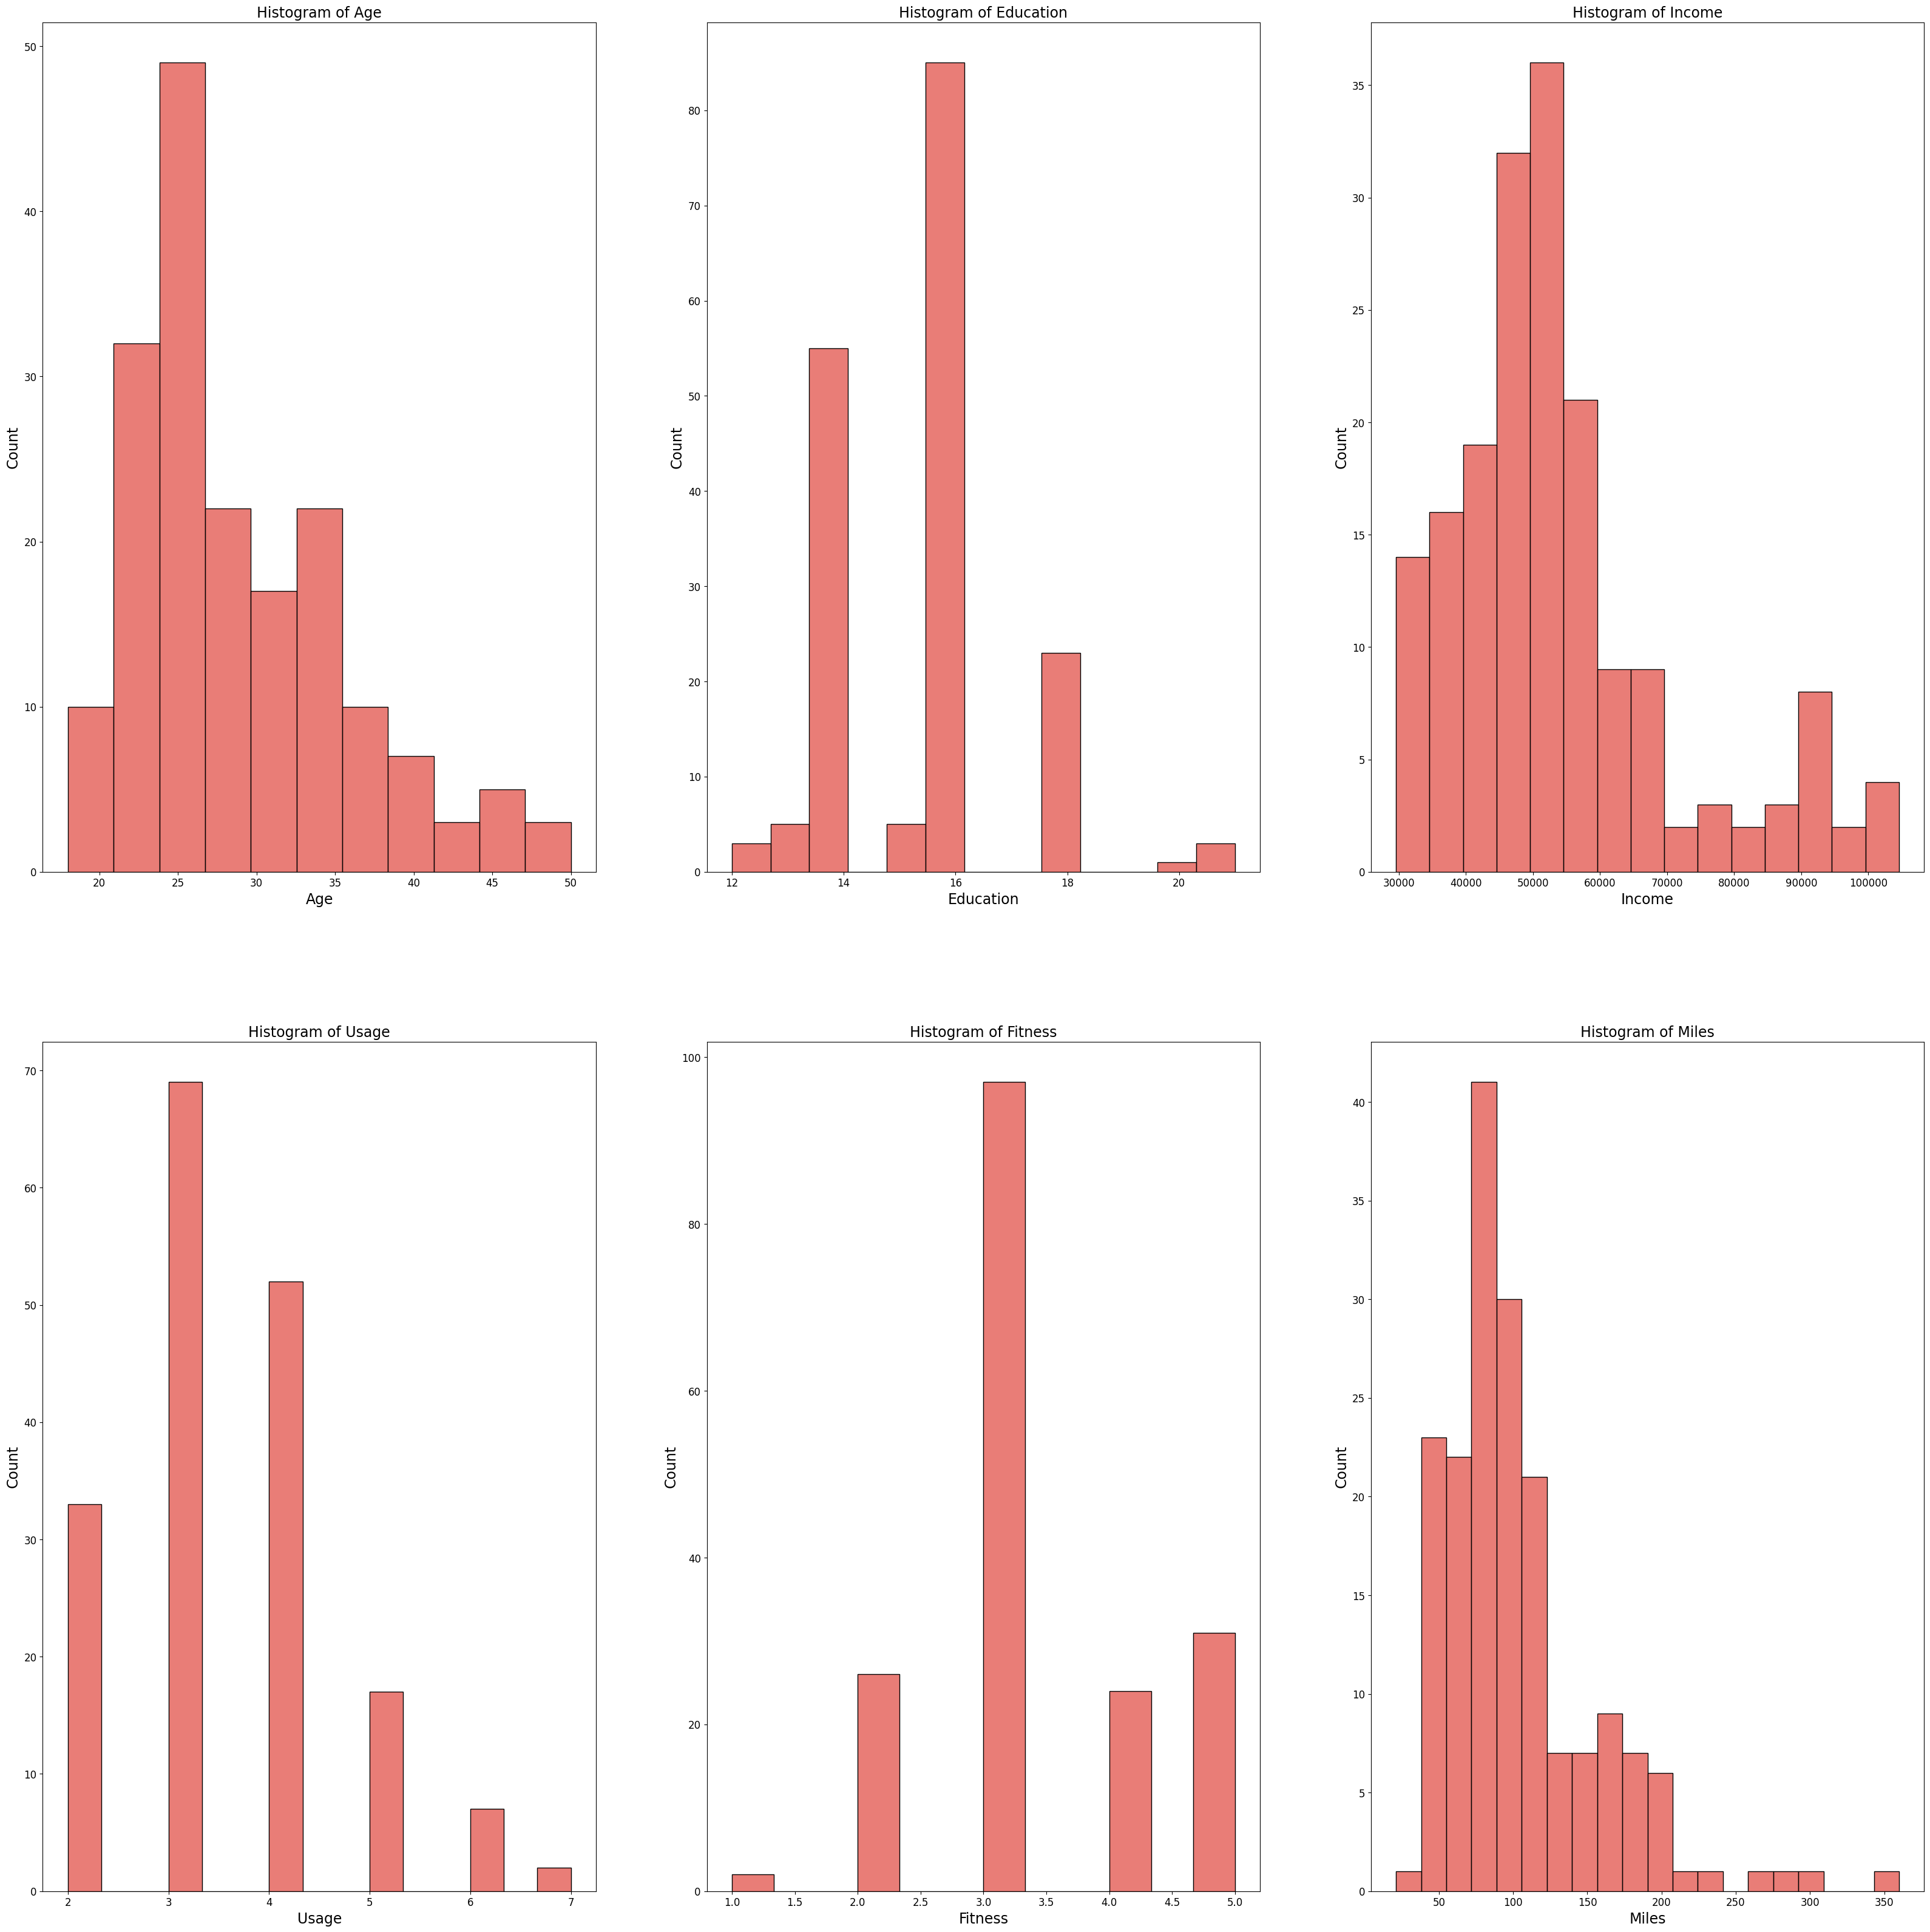

In [ ]:
# Hisplot for Continuous Variable
sns.set_palette('Spectral')
fig, axes = plt.subplots(2,3, figsize=(40, 40))
axes = axes.flatten()

for i, column in enumerate(continuous_var):
    sns.histplot(aerofit_data[column], ax=axes[i])
    axes[i].set_title(f'Histogram of {column.capitalize()}', fontsize= 17)
    axes[i].set_ylabel('Count', fontsize=17)
    axes[i].set_xlabel(column.capitalize(), fontsize=17 )
    axes[i].tick_params(axis='both', labelsize=12)

plt.show()

Checking if features like marital status, Gender, and age have any effect on the product purchased
Finding if there is any relationship between the categorical variables and the output variable in the data.

In [ ]:
aerofit_data.groupby('MaritalStatus')['Product'].value_counts()
aerofit_data.groupby('Gender')['Product'].value_counts()
aerofit_data.groupby('Age')['Product'].value_counts()

Age  Product
18   KP281      1
19   KP281      3
     KP481      1
20   KP481      3
     KP281      2
               ..
47   KP281      1
     KP781      1
48   KP481      1
     KP781      1
50   KP281      1
Name: Product, Length: 68, dtype: int64

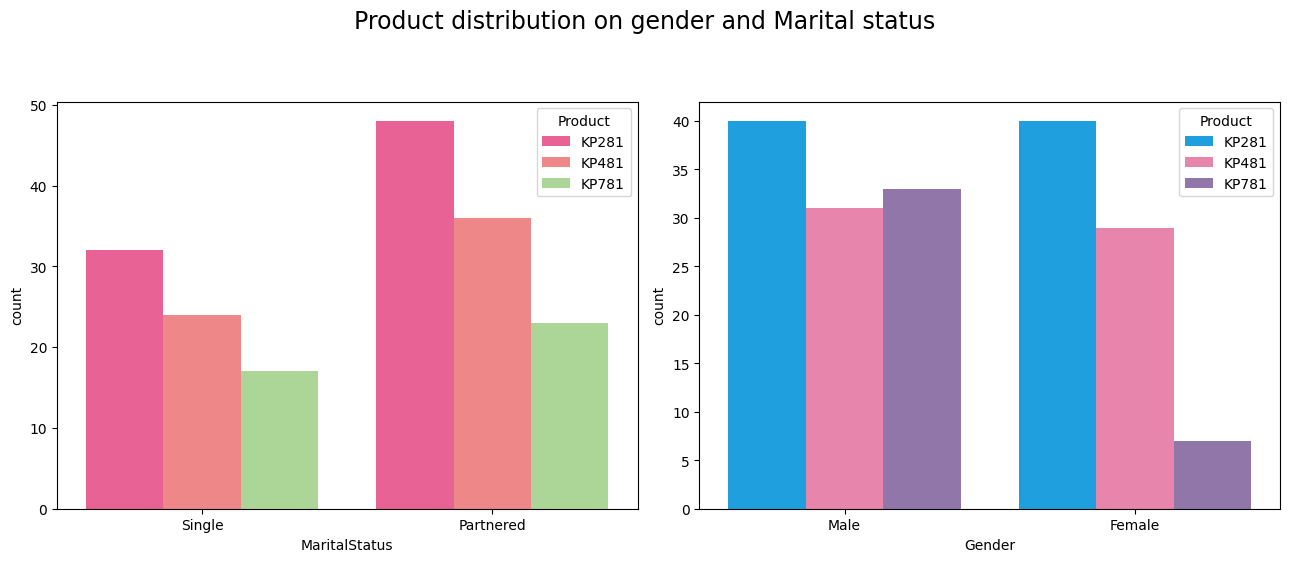

In [ ]:
plt.figure(figsize =(13,10))
plt.suptitle('Product distribution on gender and Marital status\n\n', fontsize=17)

plt.subplot(2,2,1)
sns.countplot(data = aerofit_data, x='MaritalStatus', hue='Product', palette=['#FF4B91', '#FF7676', '#A8DF8E'])

plt.subplot(2,2,2)
sns.countplot(data = aerofit_data, x='Gender', hue='Product', palette=['#00A9FF', '#F875AA', '#916DB3'])

plt.tight_layout()
plt.show()


Insights & Observations:
Upon conducting both graphical and non-graphical univariate analyses, it becomes evident that there is a higher number of male customers compared to female customers. Additionally, partnered customers seem to be more prevalent in the dataset. Moreover, it can be inferred that product KP281 is the most frequently purchased by customers who self-rate their fitness level as 3, indicating moderate fitness individuals.

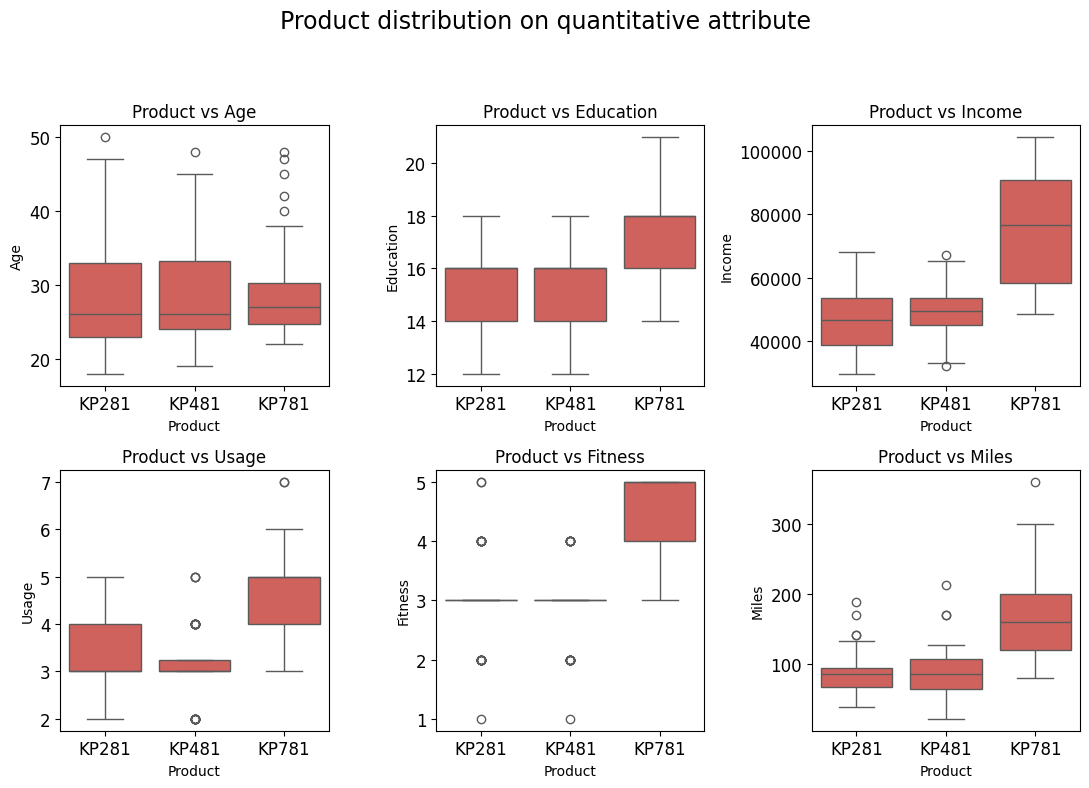

In [ ]:
# Product distribution on quantitative attribute
fig,axes = plt.subplots(2,3,figsize=(11,8))
plt.suptitle('Product distribution on quantitative attribute\n\n', fontsize=17)
axes = axes.flatten()

for i, column in enumerate(continuous_var):
    sns.boxplot(y=aerofit_data[column], x =aerofit_data['Product'],ax=axes[i])
    axes[i].set_title(f'Product vs {column.capitalize()}')
    axes[i].tick_params(axis='y',labelsize=12)
    axes[i].tick_params(axis='x',labelsize=12)
plt.tight_layout()
plt.show()

Insights & Observations:
- Product vs Age:
  - Customers purchasing products KP281 & KP481 exhibit the same median age value.
  - Customers aged between 25-30 are more inclined to buy the KP781 product.
- Product vs Education:
  - Customers with an education level greater than 16 are more prone to purchase the KP781 product.
  - Customers with an education level less than 16 have an equal likelihood of purchasing either KP281 or KP481.
- Product vs Usage:
  - Customers intending to use the treadmill more than 4 times a week are more inclined to purchase the KP781 product.
- Product vs Fitness:
  - Customers with higher fitness levels (fitness level of 3 or higher) are more likely to purchase the KP781 product.
- Product vs Income:
  - Customers with higher incomes (income of $60,000 or more) are more inclined to purchase the KP781 product.
- Product vs Miles:
  - Customers expecting to walk or run more than 120 miles per week are more likely to buy the KP781 product.

multivariate analysis

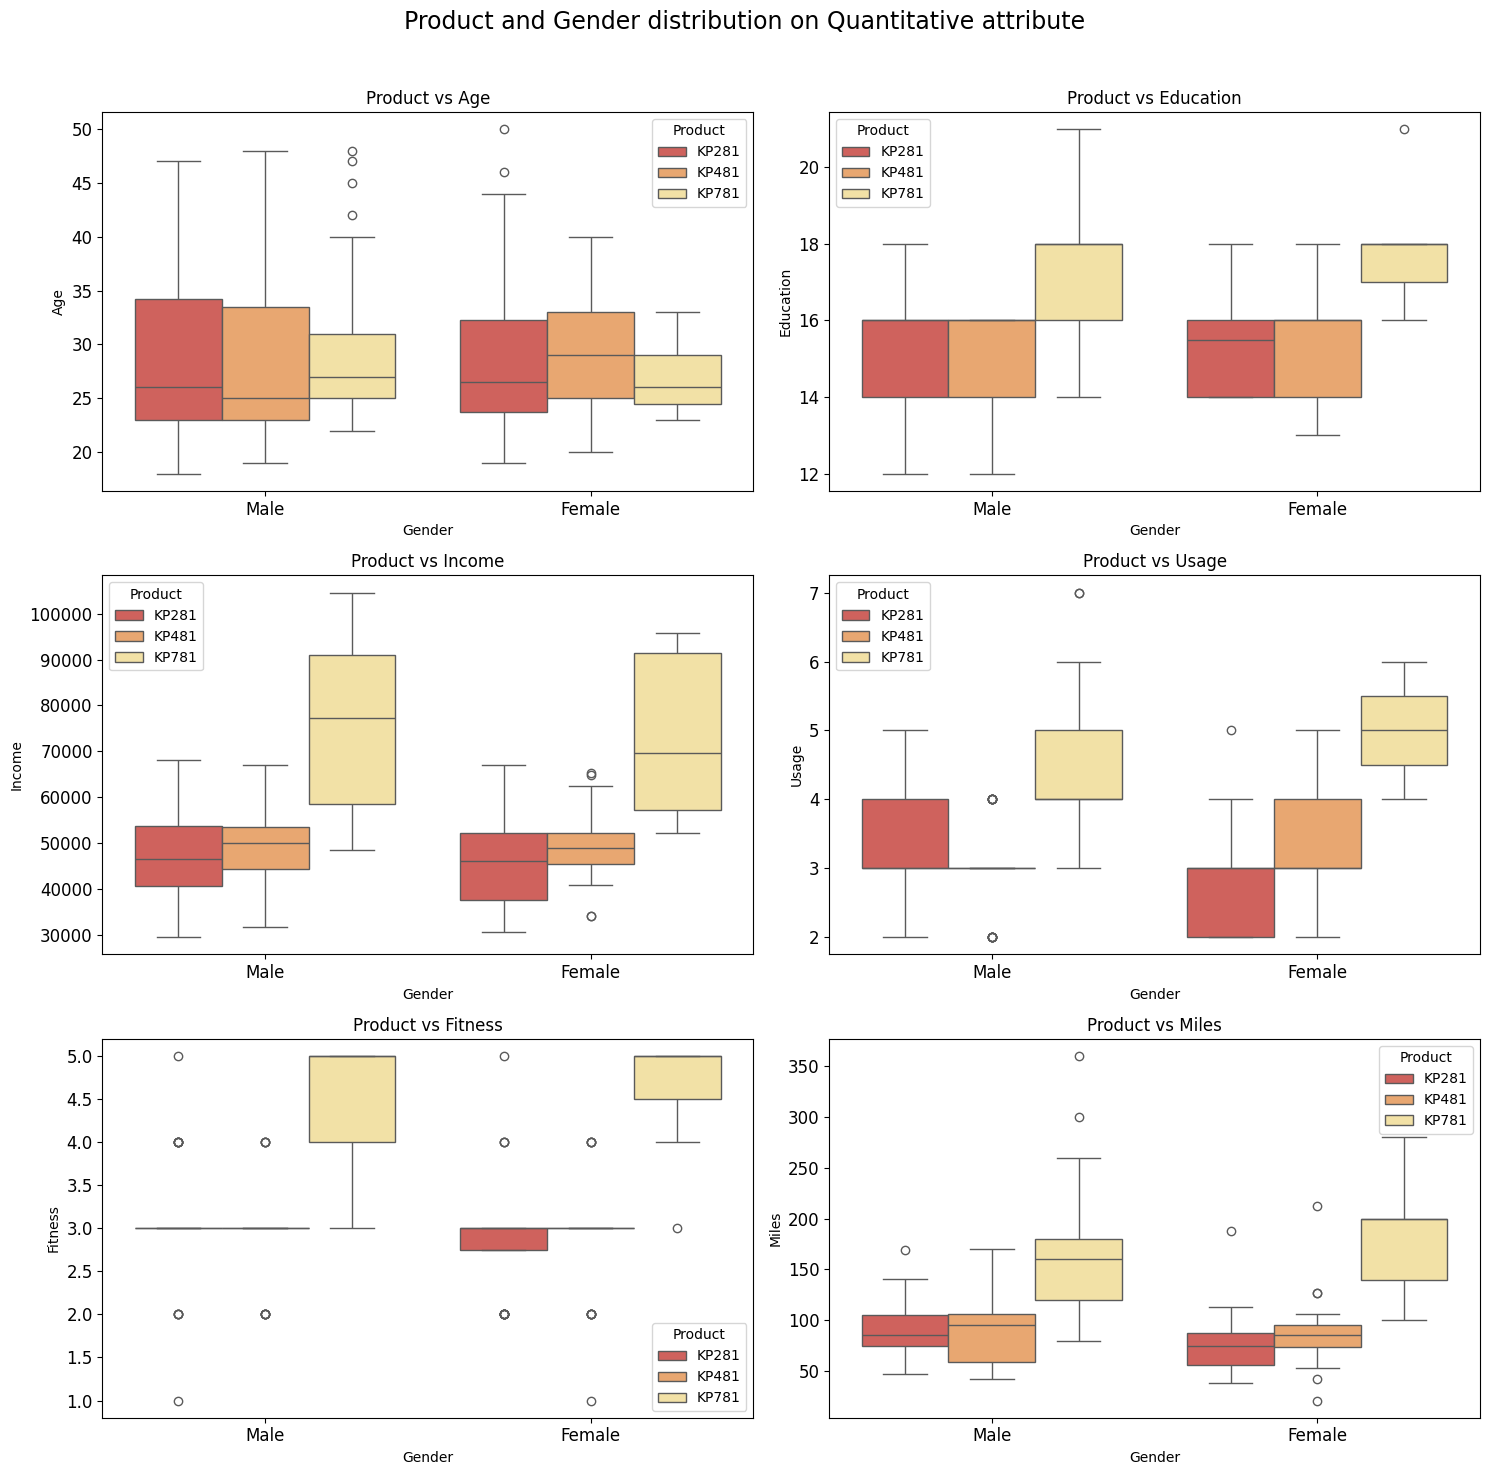

In [ ]:
fig,axes = plt.subplots(3,2,figsize=(15,15))
plt.suptitle('Product and Gender distribution on Quantitative attribute\n\n', fontsize=17)
axes = axes.flatten()

for i, column in enumerate(continuous_var):
    sns.boxplot(y=aerofit_data[column], x =aerofit_data['Gender'],ax=axes[i], hue=aerofit_data['Product'])
    axes[i].set_title(f'Product vs {column.capitalize()}')
    axes[i].tick_params(axis='y',labelsize=12)
    axes[i].tick_params(axis='x',labelsize=12)
plt.tight_layout()
plt.show()

Insights & Observations:
Female customers who plan to use the treadmill 3-4 times a week are more inclined to purchase the KP481 product.

Representing the Probability
Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)

In [ ]:
#METHOD 1
marginal_probability = aerofit_data['Product'].value_counts() / len(aerofit_data['Product'])*100
round(marginal_probability,2)

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

In [ ]:
#METHOD 2
marginal_probability= aerofit_data['Product'].value_counts(normalize=True)*100
marginal_probability

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

In [ ]:
#METHOD 3
marginal_probability_crosstab = pd.crosstab(aerofit_data['Product'],'count')
# Calculating the total number of customers
total_customers = marginal_probability_crosstab.sum().iloc[0]

# Calculating the marginal probability for each product
marginal_probability = round((marginal_probability_crosstab / total_customers) * 100, 2)
marginal_probability

col_0,count
Product,
KP281,44.44
KP481,33.33
KP781,22.22


Insights & Observations:

The KP281 treadmill appears to be the most popular, followed by KP481 and then KP781.
Approximately 44.44% of customers prefer KP281, 33.33% prefer KP481, and 22.22% prefer KP781.
Customers planning to use the treadmill more than 4 times a week might lean towards choosing KP781, as it has a higher likelihood of being purchased.
Similarly, customers with a higher fitness level (3 or above) may also be more inclined to choose KP781.
A higher income (equal to or greater than $60,000) may also influence customers to choose KP781 over the other options.
Additionally, customers expecting to walk or run more than 120 miles per week may show a preference for KP781.
These insights can be valuable for marketing and product positioning strategies, as they highlight potential target segments for each treadmill product.
To find the probability that a customer buys a product based on each column, we would need the total number of customers and the number of customers buying each product within each category. With this data, we could calculate the probabilities accordingly.

In [ ]:
#binning the age values into categories

age_bin = [17,25,35,45,float('inf')]
bin_labels = ['17-25', '25-35', '35-45', '45+']
aerofit_data['age_group'] = pd.cut(aerofit_data['Age'],bins = age_bin ,labels = bin_labels)

# binning the income values into categories
income_bin = [0,40000,60000,80000,float('inf')]
income_bin_labels = ['Low Income','Moderate Income','High Income','Very High Income']

aerofit_data['Income_Range'] = pd.cut(aerofit_data['Income'],bins = income_bin ,labels = income_bin_labels)

# binning the miles values into categories
miles_range = [0,70,100,200,float('inf')]
miles_bin_label = ['Light', 'Moderate', 'Active', 'Fitness Enthusiast ']
aerofit_data['miles_group'] = pd.cut(aerofit_data['Miles'],bins = miles_range,labels = miles_bin_label)

In [ ]:
# Calculate the probability of buying a product based on each column
probability_of_buy = {}

for column in aerofit_data.columns:
    if column not in ( 'Product', 'Age', 'Income', 'Miles'):
        probability_of_buy[column] = pd.crosstab(index=aerofit_data['Product'], columns=aerofit_data[column], margins =True, normalize=True).round(2)

# Display the probabilities
for column, prob in probability_of_buy.items():
    print(f"\nProbability of buying a product based on {column}:")
    print('-' * 70)
    print(f'{prob}\n')


Probability of buying a product based on Gender:
----------------------------------------------------------------------
Gender   Female  Male   All
Product                    
KP281      0.22  0.22  0.44
KP481      0.16  0.17  0.33
KP781      0.04  0.18  0.22
All        0.42  0.58  1.00


Probability of buying a product based on Education:
----------------------------------------------------------------------
Education    12    13    14    15    16    18    20    21   All
Product                                                        
KP281      0.01  0.02  0.17  0.02  0.22  0.01  0.00  0.00  0.44
KP481      0.01  0.01  0.13  0.01  0.17  0.01  0.00  0.00  0.33
KP781      0.00  0.00  0.01  0.00  0.08  0.11  0.01  0.02  0.22
All        0.02  0.03  0.31  0.03  0.47  0.13  0.01  0.02  1.00


Probability of buying a product based on MaritalStatus:
----------------------------------------------------------------------
MaritalStatus  Partnered  Single   All
Product                           

Insights & Observations:

Gender:
- There's a higher number of male customers compared to female customers, impacting the probability of purchasing a particular product based on gender.

Education:
- KP281: Customers with education levels 14, 16, and 18 have the highest probabilities of purchasing this treadmill.
- KP481: Customers with education levels 14, 16, and 18 also show relatively high probabilities of purchasing this treadmill.
- KP781: Customers with education level 18 exhibit the highest probability of purchasing this treadmill.

Marital Status:
- Partnered customers have a higher probability of purchasing all three treadmill products compared to single customers.

Usage:
- Customers planning to use the treadmill 3-4 times a week are more likely to buy KP281, while those planning 5+ times lean towards KP781.

Fitness:
- Customers with higher fitness levels (3-5) tend to opt for KP281, while those with lower fitness levels (1-2) are more inclined towards KP781.

Activity Lifestyle:
- Customers with different activity lifestyles exhibit varying probabilities for purchasing specific treadmill models, with Fitness Enthusiasts showing the highest likelihood for KP781.

Age Group:
- Customers aged 17-25 have a higher probability of purchasing KP281, with other age groups showing similar probabilities for all three products.

Income Range:
- Moderate and high-income customers are more likely to purchase KP281 and KP481, while low-income customers prefer KP781. Very high-income customers have higher probabilities for both KP781 and KP481.

Miles Group:
- Customers categorizing themselves as fitness enthusiasts have a higher probability of purchasing KP781, while other groups show similar probabilities for all three products.

These insights can inform targeted marketing strategies, product development, and pricing decisions.

Find the conditional probability that an event occurs given that another event has occurred. (Example: given that a customer is female, what is the probability she’ll purchase a KP481)

In [ ]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender != "Female" and gender != "Male":
        return "Invalid Gender value."
    df1 = pd.crosstab(aerofit_data['Gender'], columns=[aerofit_data['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(aerofit_data):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(aerofit_data):.2f}\n")
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



Insights & Observations:
- Male customers show a higher probability of purchasing KP281 compared to KP781 or KP481.
- Female customers also demonstrate a higher probability of purchasing KP281 compared to KP481, with the lowest probability observed for KP781.
- These conditional probabilities offer insights into the likelihood of customers purchasing specific products based on their gender.

Finding the correlation between the given features in the table.

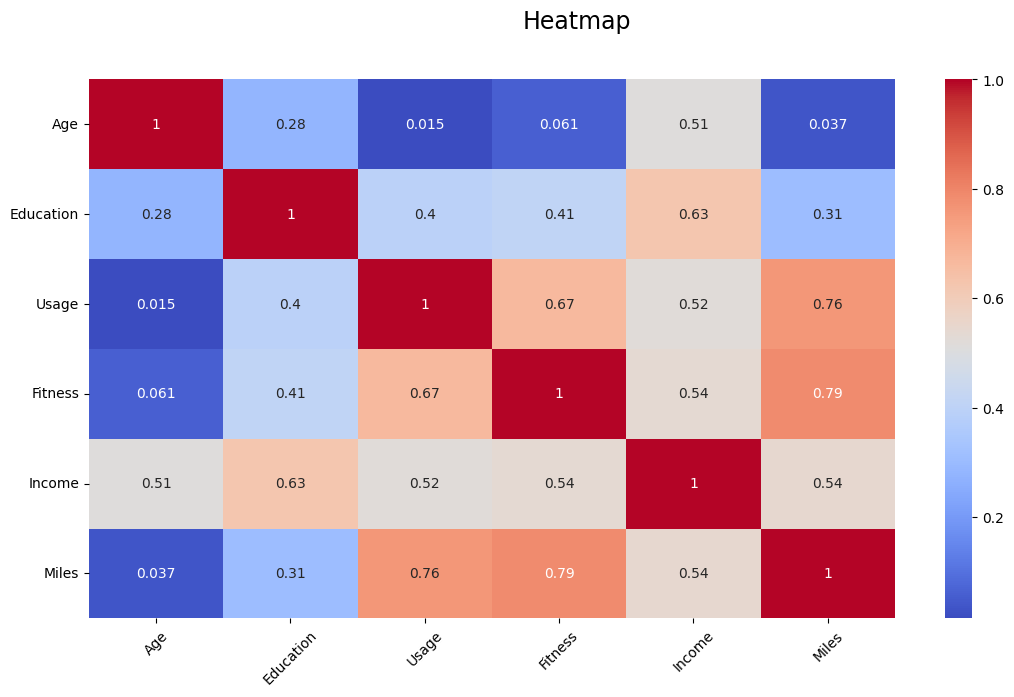

In [ ]:
correlation_matrix = aerofit_data.corr(method='pearson', numeric_only=True)

# Display the heatmap of the correlation matrix:
plt.figure(figsize=(13, 7))
plt.suptitle('Heatmap', fontsize=17)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Rotate y-axis labels for better visibility
plt.show()


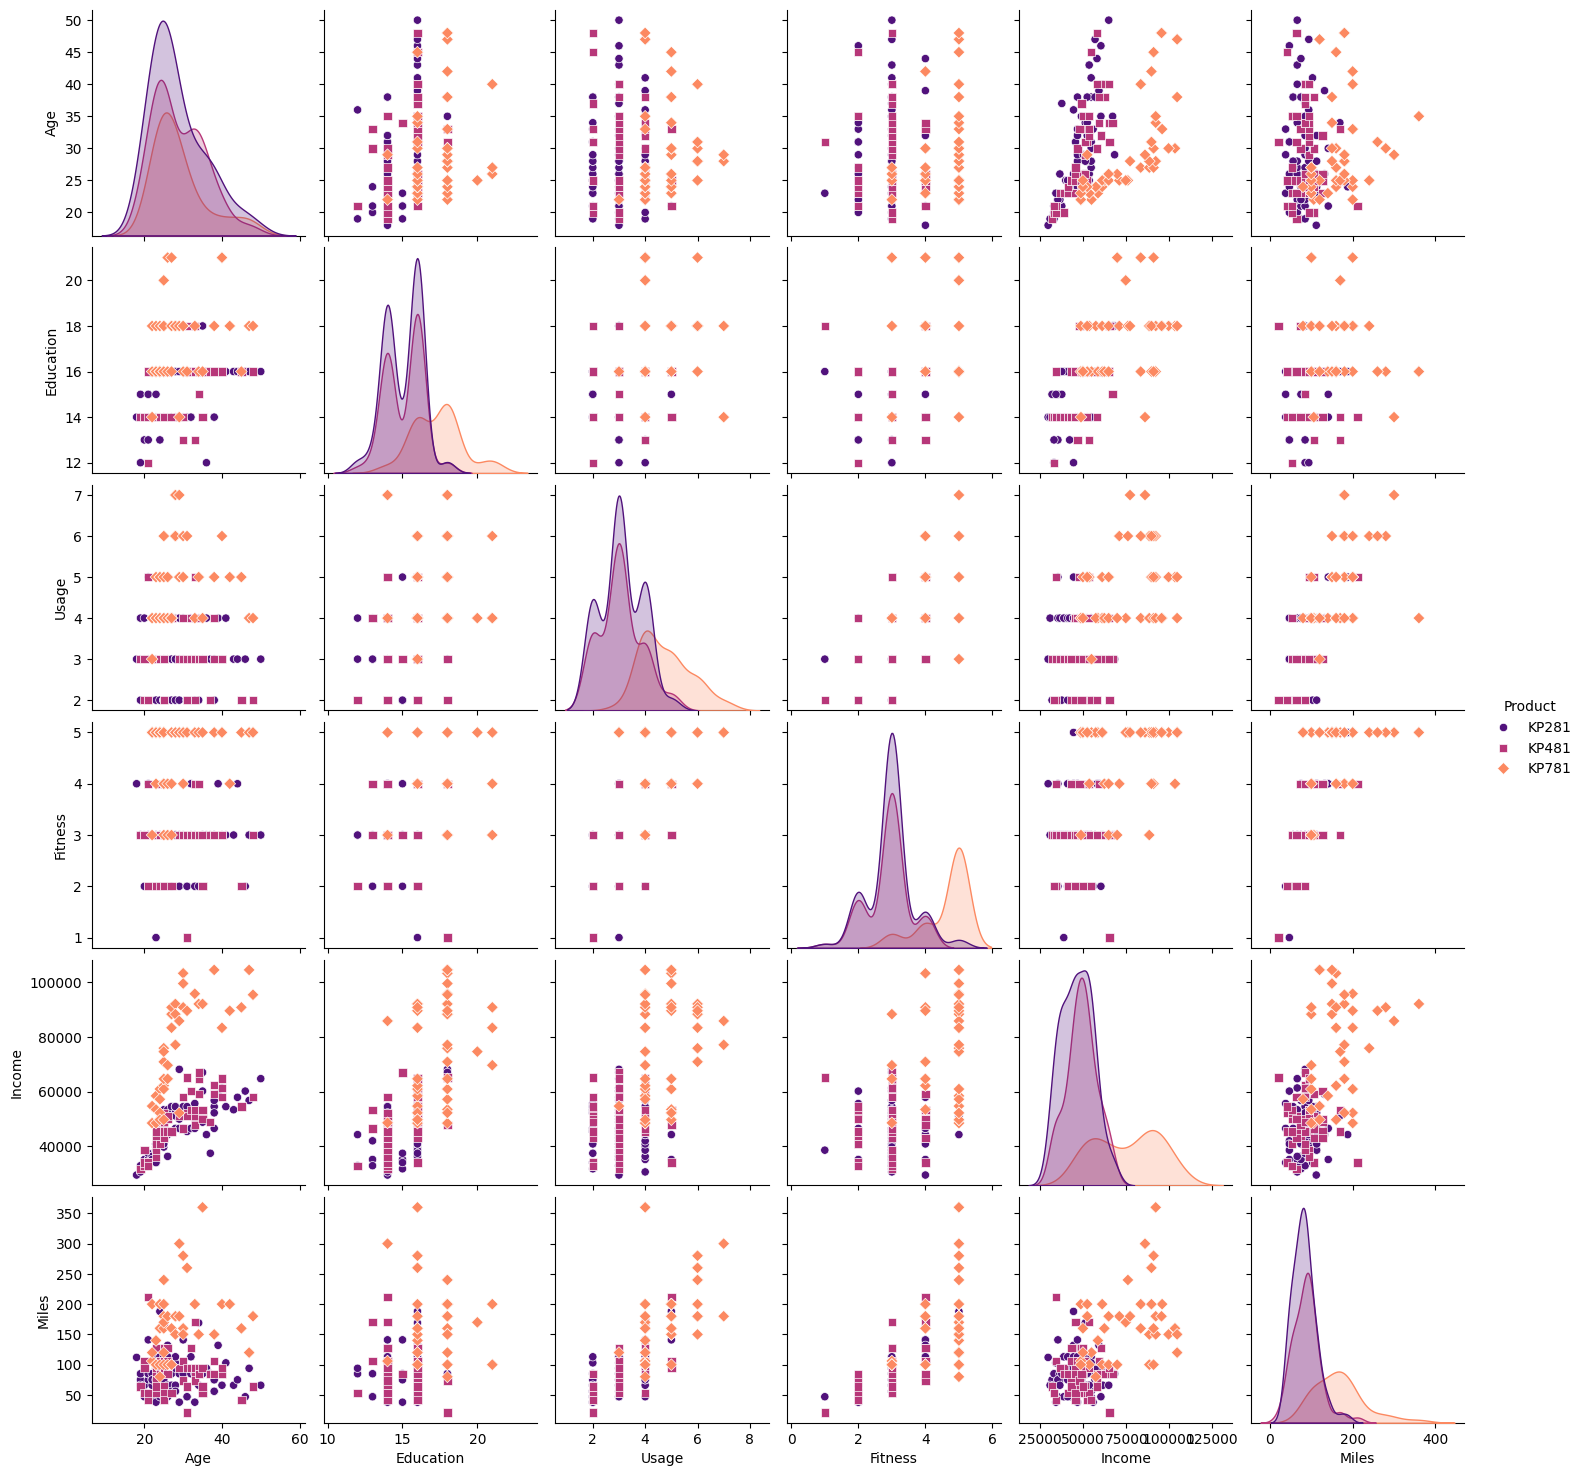

In [ ]:
# Display the Pairplot of the correlation matrix:
sns.pairplot(aerofit_data, hue ='Product', palette= 'magma', markers=["o", "s", "D"])
plt.show()


INSIGHTS & OBSERVATIONS:

Positive Correlation: Age and Income are positively correlated, indicating that as age increases, income tends to increase, and vice versa. Similarly, Education and Income also show a strong positive correlation.
Education's Influence: Higher levels of education are associated with higher income levels, better fitness ratings, and more frequent treadmill usage.
Usage and Fitness Connection: There's a strong positive correlation between treadmill usage and fitness level, suggesting that frequent users tend to have higher fitness levels.
Income Influence: Income is associated with education and miles covered, indicating that higher-income individuals may pursue more education and prefer treadmills with longer mileage capabilities.
Limited Influence of Age: Age shows weaker correlations with other variables, suggesting that it may not strongly influence income, fitness level, or usage patterns on its own.
Overall, these insights highlight the significance of usage, income, and education in understanding fitness and purchasing behaviors. Regular usage, higher income, and higher education levels are linked to higher fitness levels and potentially greater interest in advanced treadmill features.

Making customer profilings for each and every product.

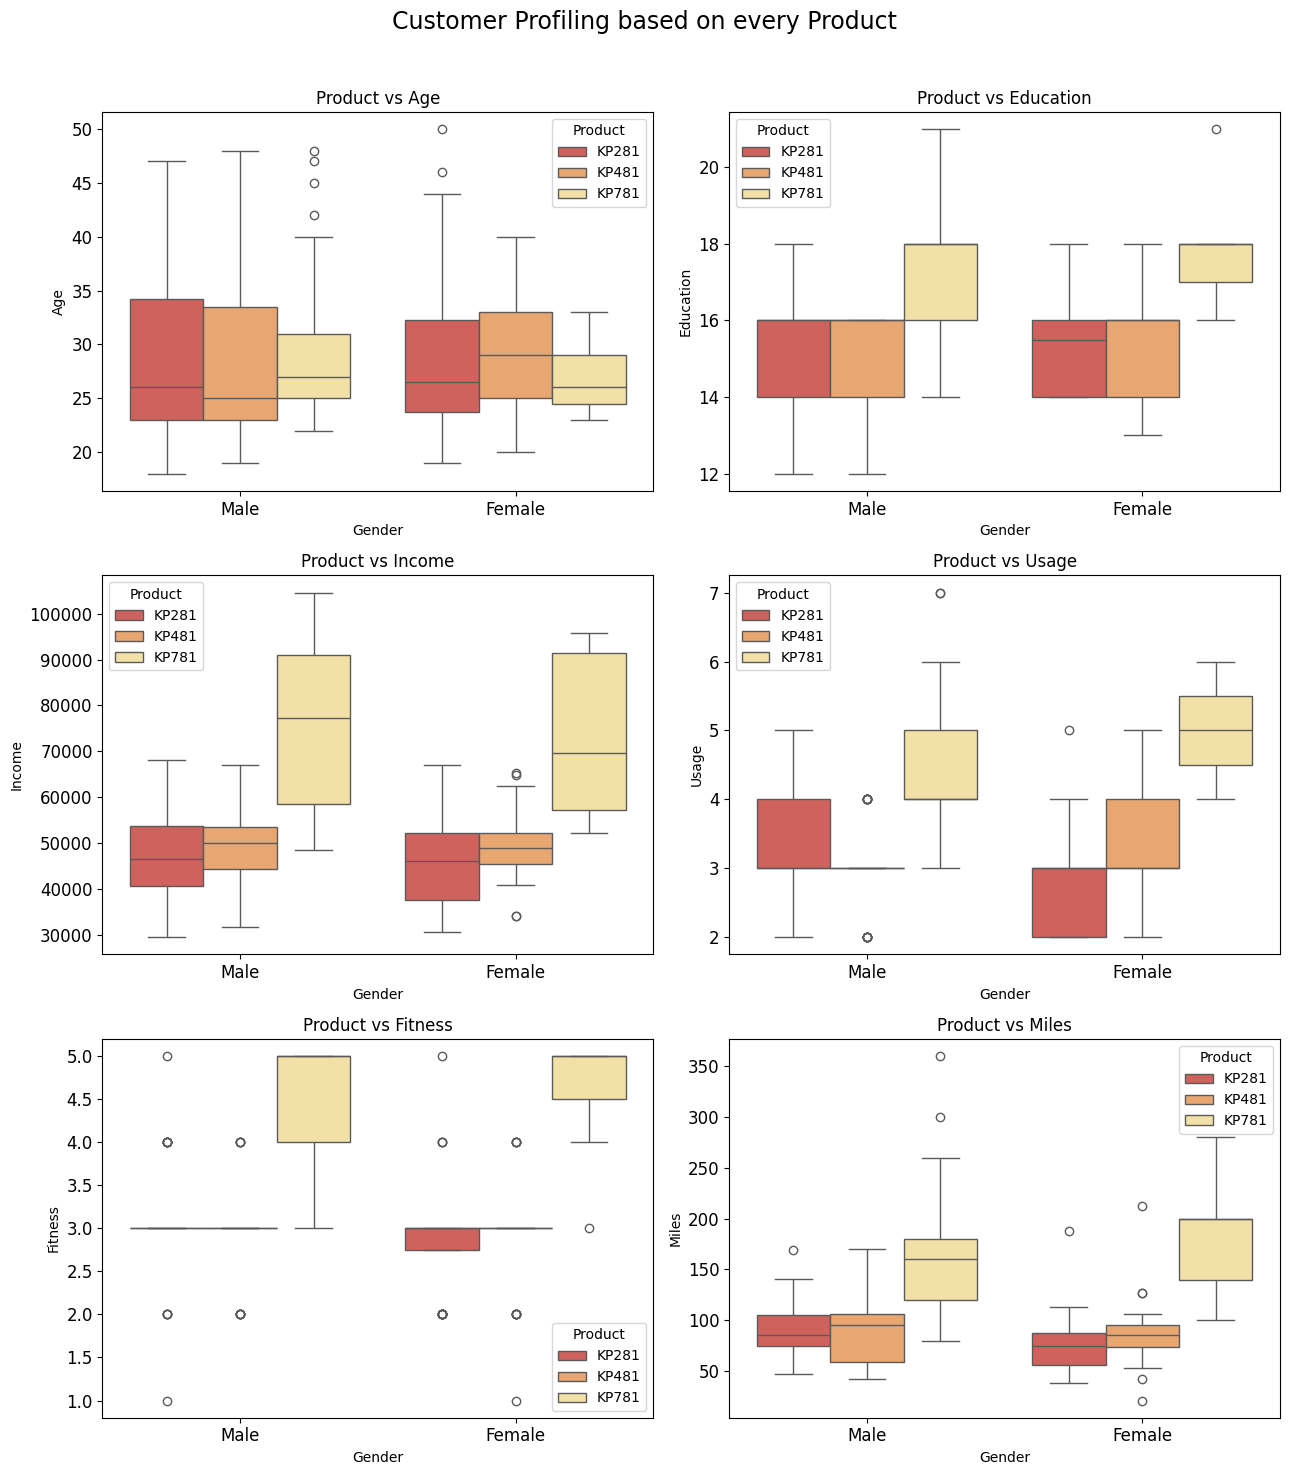

In [ ]:
fig,axes = plt.subplots(3,2,figsize=(13,15))
plt.suptitle('Customer Profiling based on every Product\n\n', fontsize=17)
axes = axes.flatten()

for i, column in enumerate(continuous_var):
    sns.boxplot(y=aerofit_data[column], x =aerofit_data['Gender'],ax=axes[i], hue=aerofit_data['Product'])
    axes[i].set_title(f'Product vs {column.capitalize()}')
    axes[i].tick_params(axis='y',labelsize=12)
    axes[i].tick_params(axis='x',labelsize=12)
plt.tight_layout()
plt.show()

INSIGHTS & OBSERVATIONS:
Customer profiling for each product entails thoroughly understanding the target customers likely to purchase that specific product. This aids in identifying their characteristics, preferences, and behaviors, crucial for devising effective marketing and sales strategies.

Based on the analysis provided:
- Probability of purchase of KP281 = 44%
- Probability of purchase of KP481 = 33%
- Probability of purchase of KP781 = 22%

6.2 Customer Profile for KP281 Treadmill:
- Age range: Predominantly 18 to 35 years, with some customers aged 35 to 50 years.
- Education level: 13 years and above.
- Annual Income: Below USD 60,000.
- Weekly Usage: 2 to 4 times.
- Fitness Scale: 2 to 4.
- Weekly Running Mileage: 50 to miles.

6.3 Customer Profile for KP481 Treadmill:
- Age range: Predominantly 18 to 35 years, with some customers aged 35 to 50 years.
- Education level: 13 years and above.
- Annual Income: Between USD 40,000 to USD 80,000.
- Weekly Usage: 2 to 4 times.
- Fitness Scale: 2 to 4.
- Weekly Running Mileage: Up to 200 miles.

6.4 Customer Profile for KP781 Treadmill:
- Gender: Male.
- Age range: 18 to 35 years.
- Education level: 15 years and above.
- Annual Income: USD 80,000 and above.
- Weekly Usage: 4 to 7 times.
- Fitness Scale: 3 to 5.
- Weekly Running Mileage: Effectiveness to 200 miles.

These profiles provide insights into the specific demographics, behaviors, and preferences associated with each treadmill product, aiding in targeted marketing and sales efforts.

Recommendations:

1. Marketing Strategy: Focus on targeting customers with higher fitness levels by promoting the benefits of regular equipment usage for health improvement.

2. Targeted Marketing for KP281: Concentrate on female and lower-income demographics due to the positive correlation between usage and fitness level, appealing to their fitness goals and affordability preferences.

3. Targeted Marketing for KP781: Aim marketing efforts towards higher-income and male demographics, highlighting advanced features and longer mileage to meet their preferences for high-performance equipment.

4. Product Development: Develop treadmill models with longer mileage to cater to customers with higher incomes and preferences for extended distance coverage. Enhance features or affordability of KP281 based on its popularity among certain groups.

5. Pricing Strategy: Adjust pricing based on target customer income levels, recognizing that higher-income individuals may value advanced features and quality differently.

6. Education Campaign: Create educational content emphasizing the link between education, income, and fitness to encourage treadmill usage as part of a healthy lifestyle.

7. Customer Segmentation: Segment customers based on activity lifestyles, income, and education levels to tailor marketing and product offerings accordingly.

8. Partnerships: Collaborate with fitness influencers or organizations targeting higher fitness levels or incomes to expand brand reach and credibility.

9. Customer Insights: Continuously collect feedback and usage data to understand preferences, needs, and satisfaction levels for better product and marketing decisions.

10. Continuous Improvement: Regularly review and analyze data to identify trends and adapt strategies to evolving customer needs and preferences.

